In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

## Load MNIST Dataset
  * see [this link](http://yann.lecun.com/exdb/mnist/)

In [2]:
from keras.datasets import mnist

((X_train, y_train), (X_test, y_test)) = mnist.load_data()

Using TensorFlow backend.
/Users/shaynekang/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


label = [5 0 4 1 9 2 1 3 1 4 3 5 3 6 1]


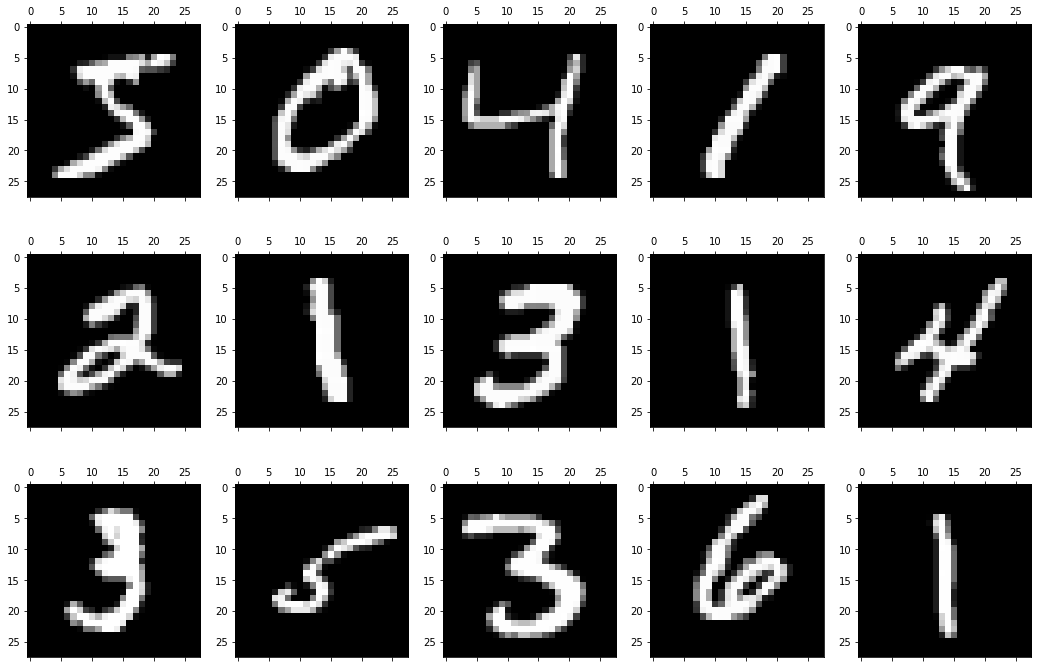

In [3]:
figure, axes = plt.subplots(nrows=3, ncols=5)
figure.set_size_inches(18, 12)

plt.gray()

print("label = {0}".format(y_train[0:15]))

axes[0][0].matshow(X_train[0])
axes[0][1].matshow(X_train[1])
axes[0][2].matshow(X_train[2])
axes[0][3].matshow(X_train[3])
axes[0][4].matshow(X_train[4])
axes[1][0].matshow(X_train[5])
axes[1][1].matshow(X_train[6])
axes[1][2].matshow(X_train[7])
axes[1][3].matshow(X_train[8])
axes[1][4].matshow(X_train[9])
axes[2][0].matshow(X_train[10])
axes[2][1].matshow(X_train[11])
axes[2][2].matshow(X_train[12])
axes[2][3].matshow(X_train[13])
axes[2][4].matshow(X_train[14])

### Preprocessing

In [4]:
X_train = X_train.reshape(60000, 28 * 28)
X_test = X_test.reshape(10000, 28 * 28)

print(X_train.shape, X_test.shape)

(60000, 784) (10000, 784)


In [5]:
y_train_hot = np.eye(10)[y_train]

print(y_train[0:5])
y_train_hot[0:5]

[5 0 4 1 9]


array([[ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]])

In [6]:
y_test_hot = np.eye(10)[y_test]

print(y_test[0:5])
y_test_hot[0:5]

[7 2 1 0 4]


array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.]])

### Define Sigmoid

0.000123394575986
0.5
0.999876605424


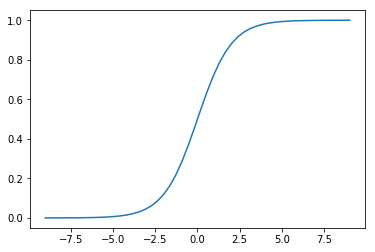

In [7]:
def sigmoid(n):
    return 1 / (1 + np.exp(-n))

xx = np.linspace(start=-9.0, stop=+9.0)
yy = sigmoid(xx)

plt.plot(xx, yy)

print(sigmoid(-9))
print(sigmoid(0))
print(sigmoid(+9))

### Multi-layer Neural Network

In [26]:
learning_rate = 0.000001

w1 = np.random.uniform(low=-0.058, high=+0.058, size=(784, 1000))
w2 = np.random.uniform(low=-0.077, high=+0.077, size=(1000, 10))

# learning_rate = 1.0

# w1 = np.random.uniform(low=0.0, high=+1.0, size=(784, 1000))
# w2 = np.random.uniform(low=0.0, high=+1.0, size=(1000, 10))

num_epoch = 100

for epoch in range(num_epoch):
    # Forward propagation
    z1 = X_train.dot(w1)
    a1 = sigmoid(z1)
    z2 = a1.dot(w2)
    a2 = sigmoid(z2)

    predict = a2.argmax(axis=1)
    error = (predict != y_train).mean()
    if error < 0.1:
        break

#     if epoch % 10 == 0:
    print("{0:2} error = {1:.5f}".format(epoch, error))
    print("w1(mean) = {0:.5f} w1(std) = {1:.5f}".format(w1.mean(), w1.std()))
    print("w2(mean) = {0:.5f} w2(std) = {1:.5f}".format(w2.mean(), w2.std()))
    
    # Backpropagation
    d2 = a2 - y_train_hot
    d1 = d2.dot(w2.T) * a1 * (1 - a1)

    w2 = w2 - learning_rate * a1.T.dot(d2)
    w1 = w1 - learning_rate * X_train.T.dot(d1)

print("----")
print("{0:2} error = {1:.5f}".format(epoch, error))

 0 error = 0.85232
w1(mean) = -0.00000 w1(std) = 0.03348
w2(mean) = -0.00003 w2(std) = 0.04448
 1 error = 0.85298
w1(mean) = -0.00000 w1(std) = 0.03349
w2(mean) = -0.01254 w2(std) = 0.04487
 2 error = 0.81498
w1(mean) = -0.00010 w1(std) = 0.03349
w2(mean) = -0.00950 w2(std) = 0.04447
 3 error = 0.68682
w1(mean) = -0.00018 w1(std) = 0.03349
w2(mean) = -0.00674 w2(std) = 0.04424
 4 error = 0.46773
w1(mean) = -0.00022 w1(std) = 0.03349
w2(mean) = -0.00461 w2(std) = 0.04417
 5 error = 0.31432
w1(mean) = -0.00023 w1(std) = 0.03350
w2(mean) = -0.00380 w2(std) = 0.04422
 6 error = 0.24828
w1(mean) = -0.00023 w1(std) = 0.03350
w2(mean) = -0.00357 w2(std) = 0.04431
 7 error = 0.24442
w1(mean) = -0.00022 w1(std) = 0.03350
w2(mean) = -0.00376 w2(std) = 0.04441
 8 error = 0.20982
w1(mean) = -0.00021 w1(std) = 0.03350
w2(mean) = -0.00374 w2(std) = 0.04451
 9 error = 0.21067
w1(mean) = -0.00021 w1(std) = 0.03350
w2(mean) = -0.00391 w2(std) = 0.04462
10 error = 0.18623
w1(mean) = -0.00020 w1(std) = 0

KeyboardInterrupt: 

label = [5 0 4 1 9 2 1 3 1 4 3 5 3 6 1]


,y(actual),y(predict)
0,7,7
1,2,2
2,1,1
3,0,0
4,4,4
5,1,1
6,4,4
7,9,9
8,5,2
9,9,9


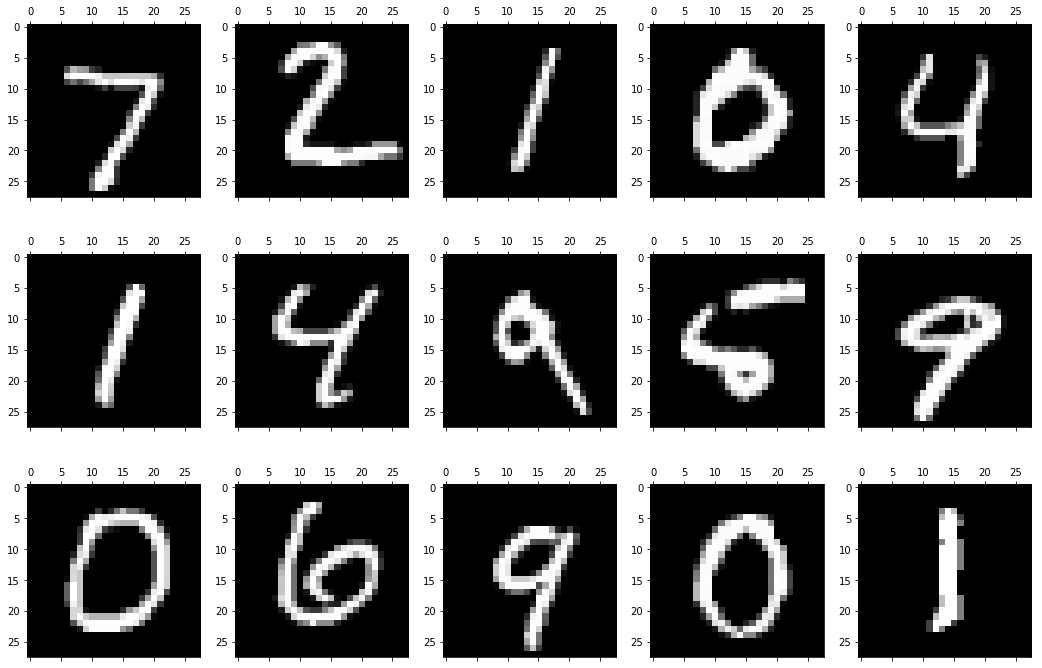

In [23]:
z1 = X_test.dot(w1)
a1 = sigmoid(z1)
z2 = a1.dot(w2)
a2 = sigmoid(z2)

predict = a2.argmax(axis=1)

figure, axes = plt.subplots(nrows=3, ncols=5)
figure.set_size_inches(18, 12)

plt.gray()

print("label = {0}".format(y_train[0:15]))

axes[0][0].matshow(X_test[0].reshape(28, 28))
axes[0][1].matshow(X_test[1].reshape(28, 28))
axes[0][2].matshow(X_test[2].reshape(28, 28))
axes[0][3].matshow(X_test[3].reshape(28, 28))
axes[0][4].matshow(X_test[4].reshape(28, 28))
axes[1][0].matshow(X_test[5].reshape(28, 28))
axes[1][1].matshow(X_test[6].reshape(28, 28))
axes[1][2].matshow(X_test[7].reshape(28, 28))
axes[1][3].matshow(X_test[8].reshape(28, 28))
axes[1][4].matshow(X_test[9].reshape(28, 28))
axes[2][0].matshow(X_test[10].reshape(28, 28))
axes[2][1].matshow(X_test[11].reshape(28, 28))
axes[2][2].matshow(X_test[12].reshape(28, 28))
axes[2][3].matshow(X_test[13].reshape(28, 28))
axes[2][4].matshow(X_test[14].reshape(28, 28))

pd.DataFrame({'y(actual)': y_test, 'y(predict)': predict}).head(15)

### Add Bias

In [35]:
learning_rate = 0.000001

w1 = np.random.uniform(low=-0.058, high=+0.058, size=(784, 1000))
w2 = np.random.uniform(low=-0.077, high=+0.077, size=(1000, 10))

b1 = np.random.uniform(low=0, high=0, size=(1, 1000))
b2 = np.random.uniform(low=0, high=0, size=(1, 10))

# learning_rate = 1.0

# w1 = np.random.uniform(low=0.0, high=+1.0, size=(784, 1000))
# w2 = np.random.uniform(low=0.0, high=+1.0, size=(1000, 10))

num_epoch = 100

for epoch in range(num_epoch):
    # Forward propagation
    z1 = X_train.dot(w1) + b1
    a1 = sigmoid(z1)
    z2 = a1.dot(w2) + b2
    a2 = sigmoid(z2)

    predict = a2.argmax(axis=1)
    error = (predict != y_train).mean()
    if error < 0.1:
        break

#     if epoch % 10 == 0:
    print("{0:2} error = {1:.5f}".format(epoch, error))
    print("w1(mean) = {0:.5f} w1(std) = {1:.5f}".format(w1.mean(), w1.std()))
    print("w2(mean) = {0:.5f} w2(std) = {1:.5f}".format(w2.mean(), w2.std()))
    print("b1(mean) = {0:.5f} b1(std) = {1:.5f}".format(b1.mean(), b1.std()))
    print("b2(mean) = {0:.5f} b2(std) = {1:.5f}".format(b2.mean(), b2.std()))
    
    # Backpropagation
    d2 = a2 - y_train_hot
    d1 = d2.dot(w2.T) * a1 * (1 - a1)

    w2 = w2 - learning_rate * a1.T.dot(d2)
    w1 = w1 - learning_rate * X_train.T.dot(d1)
    
    b2 = b2 - learning_rate * d2.mean(axis=0)
    b1 = b1 - learning_rate * d1.mean(axis=0)

print("----")
print("{0:2} error = {1:.5f}".format(epoch, error))

 0 error = 0.91690
w1(mean) = 0.00003 w1(std) = 0.03348
w2(mean) = -0.00004 w2(std) = 0.04445
b1(mean) = 0.00000 b1(std) = 0.00000
b2(mean) = 0.00000 b2(std) = 0.00000
 1 error = 0.89782
w1(mean) = 0.00001 w1(std) = 0.03350
w2(mean) = -0.01276 w2(std) = 0.04492
b1(mean) = -0.00000 b1(std) = 0.00000
b2(mean) = -0.00000 b2(std) = 0.00000
 2 error = 0.89717
w1(mean) = -0.00010 w1(std) = 0.03350
w2(mean) = -0.00990 w2(std) = 0.04449
b1(mean) = -0.00000 b1(std) = 0.00000
b2(mean) = -0.00000 b2(std) = 0.00000
 3 error = 0.67568
w1(mean) = -0.00018 w1(std) = 0.03350
w2(mean) = -0.00771 w2(std) = 0.04420
b1(mean) = -0.00000 b1(std) = 0.00000
b2(mean) = -0.00000 b2(std) = 0.00000
 4 error = 0.53712
w1(mean) = -0.00023 w1(std) = 0.03350
w2(mean) = -0.00574 w2(std) = 0.04406
b1(mean) = -0.00000 b1(std) = 0.00000
b2(mean) = -0.00000 b2(std) = 0.00000
 5 error = 0.41830
w1(mean) = -0.00025 w1(std) = 0.03350
w2(mean) = -0.00483 w2(std) = 0.04402
b1(mean) = -0.00000 b1(std) = 0.00000
b2(mean) = -0.00


KeyboardInterrupt



### 2 hidden layer

In [ ]:
learning_rate = 0.000001

w1 = np.random.uniform(low=-0.058, high=+0.058, size=(784, 1000))
w2 = np.random.uniform(low=-0.055, high=+0.055, size=(1000, 1000))
w3 = np.random.uniform(low=-0.077, high=+0.077, size=(1000, 10))

b1 = np.random.uniform(low=0, high=0, size=(1, 1000))
b2 = np.random.uniform(low=0, high=0, size=(1, 1000))
b3 = np.random.uniform(low=0, high=0, size=(1, 10))

num_epoch = 100

for epoch in range(num_epoch):
    # Forward propagation
    z1 = X_train.dot(w1) + b1
    a1 = sigmoid(z1)
    z2 = a1.dot(w2) + b2
    a2 = sigmoid(z2)
    z3 = a2.dot(w3) + b3
    a3 = sigmoid(z3)

    predict = a3.argmax(axis=1)
    error = (predict != y_train).mean()
    if error < 0.1:
        break

#     if epoch % 10 == 0:
    print("{0:2} error = {1:.5f}".format(epoch, error))
    print("w1(mean) = {0:.5f} w1(std) = {1:.5f}".format(w1.mean(), w1.std()))
    print("w2(mean) = {0:.5f} w2(std) = {1:.5f}".format(w2.mean(), w2.std()))
    print("w3(mean) = {0:.5f} w3(std) = {1:.5f}".format(w3.mean(), w3.std()))
    print("b1(mean) = {0:.5f} b1(std) = {1:.5f}".format(b1.mean(), b1.std()))
    print("b2(mean) = {0:.5f} b2(std) = {1:.5f}".format(b2.mean(), b2.std()))
    print("b3(mean) = {0:.5f} b3(std) = {1:.5f}".format(b3.mean(), b3.std()))
    
    # Backpropagation
    d3 = a3 - y_train_hot
    d2 = d3.dot(w3.T) * a2 * (1 - a2)
    d1 = d2.dot(w2.T) * a1 * (1 - a1)

    w3 = w3 - learning_rate * a2.T.dot(d3)
    w2 = w2 - learning_rate * a1.T.dot(d2)
    w1 = w1 - learning_rate * X_train.T.dot(d1)

    b3 = b3 - learning_rate * d3.mean(axis=0)
    b2 = b2 - learning_rate * d2.mean(axis=0)
    b1 = b1 - learning_rate * d1.mean(axis=0)

print("----")
print("{0:2} error = {1:.5f}".format(epoch, error))

 0 error = 0.89870
w1(mean) = -0.00000 w1(std) = 0.03349
w2(mean) = 0.00004 w2(std) = 0.03176
w3(mean) = -0.00004 w3(std) = 0.04437
b1(mean) = 0.00000 b1(std) = 0.00000
b2(mean) = 0.00000 b2(std) = 0.00000
b3(mean) = 0.00000 b3(std) = 0.00000
 1 error = 0.89782
w1(mean) = -0.00001 w1(std) = 0.03349
w2(mean) = 0.00003 w2(std) = 0.03177
w3(mean) = -0.01194 w3(std) = 0.04459
b1(mean) = -0.00000 b1(std) = 0.00000
b2(mean) = -0.00000 b2(std) = 0.00000
b3(mean) = -0.00000 b3(std) = 0.00000
 2 error = 0.89688
w1(mean) = -0.00002 w1(std) = 0.03349
w2(mean) = -0.00004 w2(std) = 0.03177
w3(mean) = -0.00909 w3(std) = 0.04443
b1(mean) = -0.00000 b1(std) = 0.00000
b2(mean) = -0.00000 b2(std) = 0.00000
b3(mean) = -0.00000 b3(std) = 0.00000
 3 error = 0.82820
w1(mean) = -0.00003 w1(std) = 0.03349
w2(mean) = -0.00010 w2(std) = 0.03177
w3(mean) = -0.00680 w3(std) = 0.04429
b1(mean) = -0.00000 b1(std) = 0.00000
b2(mean) = -0.00000 b2(std) = 0.00000
b3(mean) = -0.00000 b3(std) = 0.00000
 4 error = 0.7773

b2(mean) = -0.00000 b2(std) = 0.00000
b3(mean) = -0.00000 b3(std) = 0.00000
34 error = 0.22287
w1(mean) = -0.00005 w1(std) = 0.03349
w2(mean) = -0.00013 w2(std) = 0.03179
w3(mean) = -0.00426 w3(std) = 0.04623
b1(mean) = -0.00000 b1(std) = 0.00000
b2(mean) = -0.00000 b2(std) = 0.00000
b3(mean) = -0.00000 b3(std) = 0.00000
35 error = 0.21978
w1(mean) = -0.00005 w1(std) = 0.03349
w2(mean) = -0.00012 w2(std) = 0.03179
w3(mean) = -0.00428 w3(std) = 0.04634
b1(mean) = -0.00000 b1(std) = 0.00000
b2(mean) = -0.00000 b2(std) = 0.00000
b3(mean) = -0.00000 b3(std) = 0.00000
36 error = 0.21725
w1(mean) = -0.00005 w1(std) = 0.03349
w2(mean) = -0.00012 w2(std) = 0.03179
w3(mean) = -0.00430 w3(std) = 0.04644
b1(mean) = -0.00000 b1(std) = 0.00000
b2(mean) = -0.00000 b2(std) = 0.00000
b3(mean) = -0.00000 b3(std) = 0.00000
37 error = 0.21470
w1(mean) = -0.00005 w1(std) = 0.03349
w2(mean) = -0.00012 w2(std) = 0.03179
w3(mean) = -0.00433 w3(std) = 0.04655
b1(mean) = -0.00000 b1(std) = 0.00000
b2(mean) = -